<a href="https://colab.research.google.com/github/unzilenurkaya/hotel-reservation-app/blob/main/Hotel_Reservation_Projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import zipfile

with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [3]:
import pandas as pd

df = pd.read_csv("Hotel Reservations.csv")
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Satır ve sütun sayısı
df.shape

(36275, 19)

In [5]:
# Sütun isimleri ve veri tipleri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
df['booking_status'].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


In [8]:
df.isnull().sum()


,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [9]:
cat_features = df.select_dtypes(include=['object']).columns
num_features = df.select_dtypes(exclude=['object']).columns
print("Kategorik Özellikler:", cat_features)
print("Sayısal Özellikler:", num_features)


Kategorik Özellikler: Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')
Sayısal Özellikler: Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


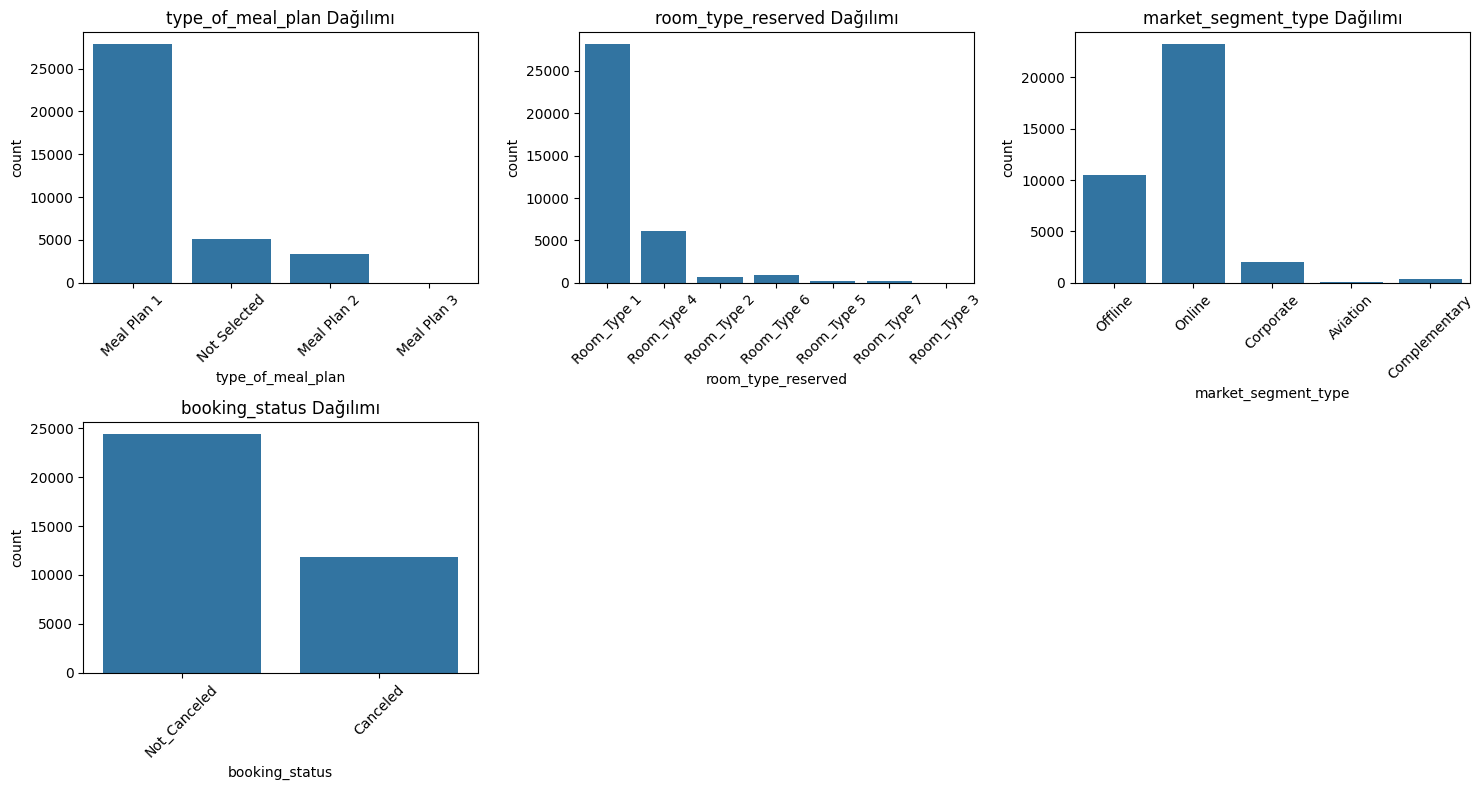

In [10]:
plt.figure(figsize=(15, 8))
for idx, col in enumerate(cat_features[1:], 1):  # Booking_ID hariç tutuldu
    plt.subplot(2, 3, idx)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Dağılımı")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


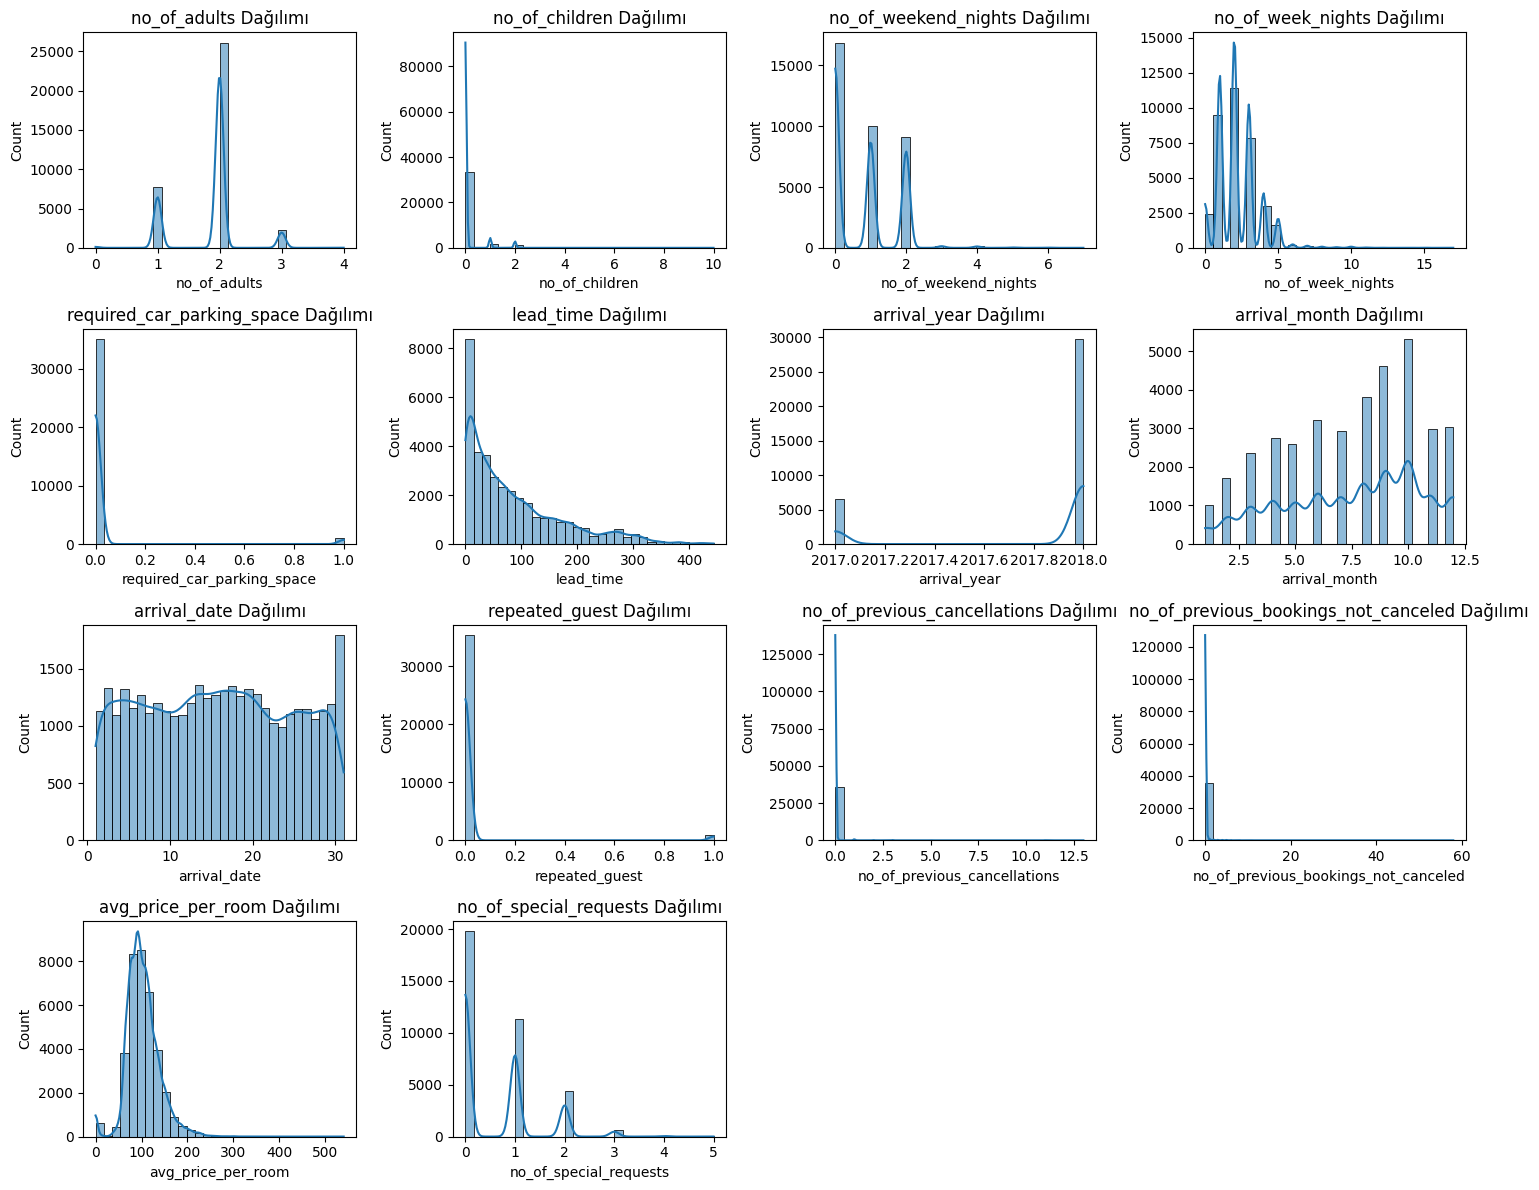

In [11]:
plt.figure(figsize=(15, 12))
for idx, col in enumerate(num_features, 1):
    plt.subplot(4, 4, idx)  # 4 satır, 4 sütun
    sns.histplot(data=df, x=col, bins=30, kde=True)
    plt.title(f"{col} Dağılımı")
plt.tight_layout()
plt.show()


In [12]:
def remove_outliers_iqr(df, numeric_cols):
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

# num_features listenizdeki sayısal sütunlardan aykırıları temizle
df_cleaned = remove_outliers_iqr(df.copy(),num_features)

In [13]:
def group_rare_categories(df, cat_columns, threshold=0.01):
    for col in cat_columns:
        freqs = df[col].value_counts(normalize=True)
        rare_labels = freqs[freqs < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in rare_labels else x)
    return df

# Booking_ID gibi işlem dışı tutulacakları çıkar (ilk elemanı at)
df_cleaned = group_rare_categories(df_cleaned, cat_features[1:])

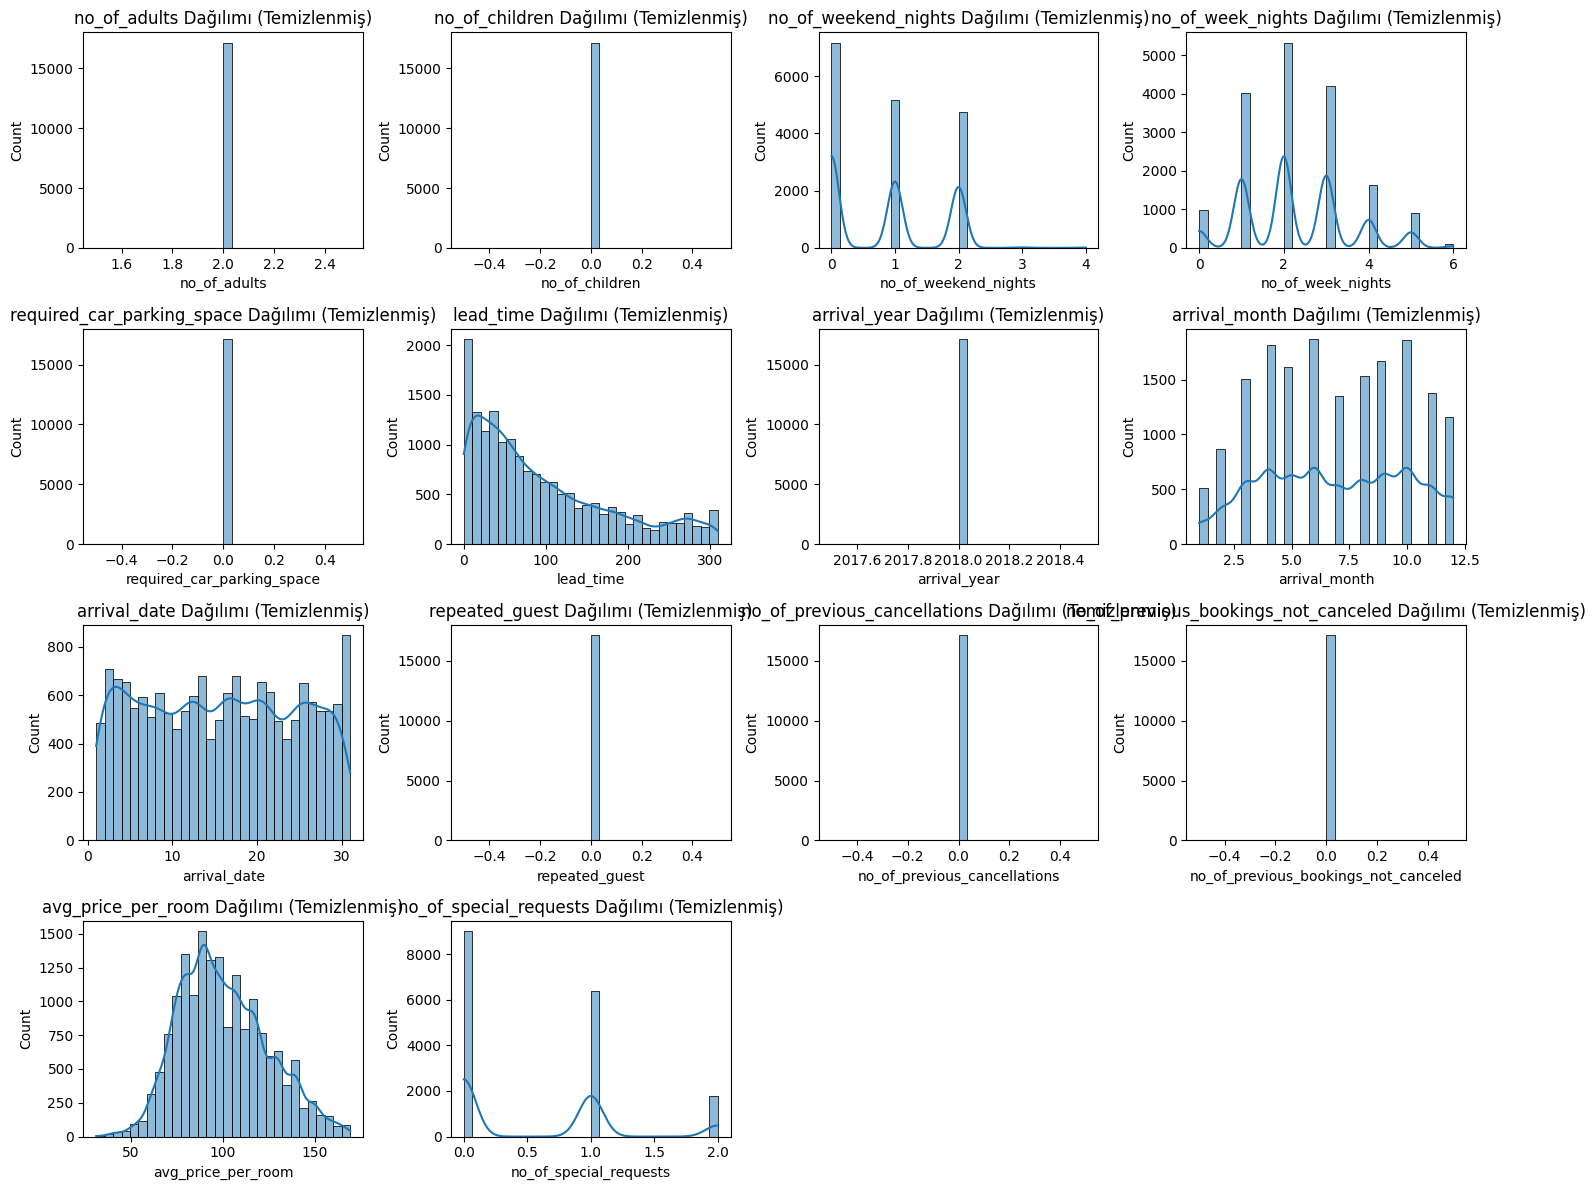

In [14]:
plt.figure(figsize=(15, 12))
for idx, col in enumerate(num_features, 1):
    plt.subplot(4, 4, idx)
    sns.histplot(data=df_cleaned, x=col, bins=30, kde=True)
    plt.title(f"{col} Dağılımı (Temizlenmiş)")
plt.tight_layout()
plt.show()

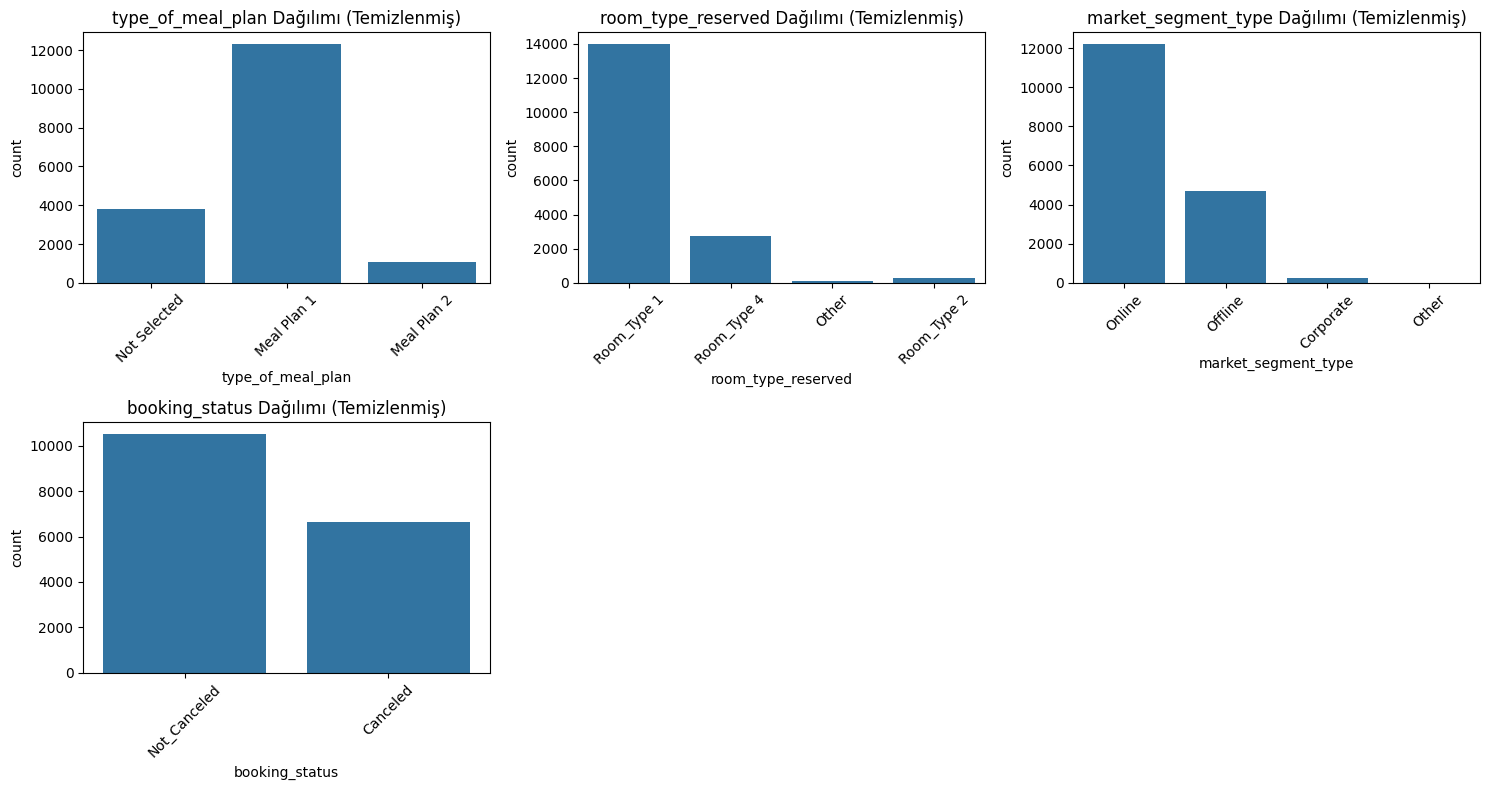

In [15]:
plt.figure(figsize=(15, 8))
for idx, col in enumerate(cat_features[1:], 1):
    plt.subplot(2, 3, idx)
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f"{col} Dağılımı (Temizlenmiş)")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunları seç (güncel, temizlenmiş veri üzerinden)
cat_cols = df_cleaned.select_dtypes(include='object').columns.tolist()

# 1. Binary (iki sınıflı) olanları Label Encode edelim
le = LabelEncoder()
binary_cols = [col for col in cat_cols if df_cleaned[col].nunique() == 2]

for col in binary_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

# 2. Geri kalan çok kategorili değişkenleri One-Hot Encode edelim
multi_cat_cols = [col for col in cat_cols if col not in binary_cols]

df_encoded = pd.get_dummies(df_cleaned, columns=multi_cat_cols, drop_first=True)

In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17158 entries, 1 to 36274
Columns: 17180 entries, no_of_adults to market_segment_type_Other
dtypes: bool(17165), float64(1), int64(14)
memory usage: 283.0 MB


In [18]:
X = df_encoded.drop('booking_status', axis=1)
y = df_encoded['booking_status']

In [19]:
# Sabit (tek değerli) sütunları otomatik olarak çıkar
nunique = df_encoded.nunique()
constant_cols = nunique[nunique == 1].index.tolist()

# Bu sütunları çıkar
df_encoded_cleaned = df_encoded.drop(columns=constant_cols)

print(f"Silinen sabit sütunlar: {constant_cols}")

Silinen sabit sütunlar: ['no_of_adults', 'no_of_children', 'required_car_parking_space', 'arrival_year', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']


In [20]:
nan_cols = df_encoded_cleaned.columns[df_encoded_cleaned.isnull().any()].tolist()
print(f"NaN içeren sütunlar: {nan_cols}")

# NaN olanları (varsa) silebiliriz
df_encoded_cleaned = df_encoded_cleaned.drop(columns=nan_cols)

NaN içeren sütunlar: []


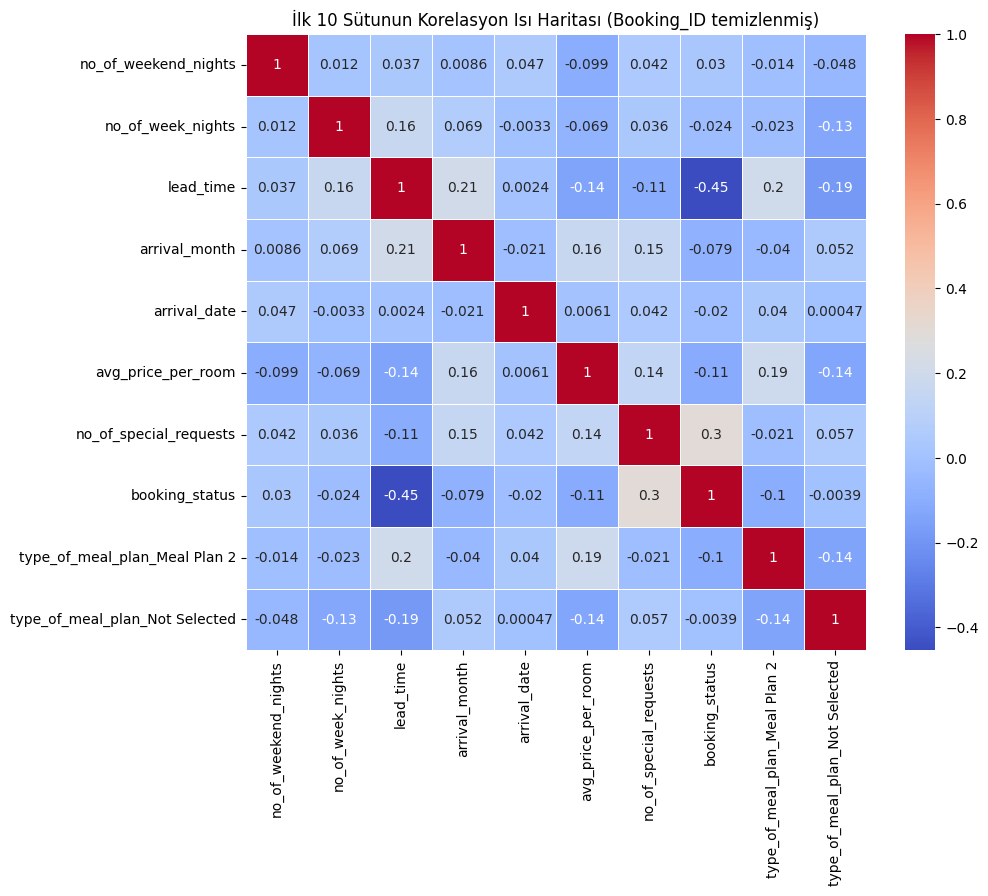

In [21]:
# Booking_ID ile başlayan tüm sütunları temizle
booking_id_cols = [col for col in df_encoded_cleaned.columns if col.startswith('Booking_ID')]
df_encoded_cleaned = df_encoded_cleaned.drop(columns=booking_id_cols)

# Yeni ilk 10 sütun için korelasyon ısı haritası
subset_df = df_encoded_cleaned.iloc[:, :10]
corr = subset_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("İlk 10 Sütunun Korelasyon Isı Haritası (Booking_ID temizlenmiş)")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# Eğer henüz ayrılmadıysa X ve y'yi tanımla
X = df_encoded_cleaned.drop("booking_status", axis=1)
y = df_encoded_cleaned["booking_status"]

# Eğitim/test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                               stratify=y)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Sonuçları tablo halinde göster
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)
display(results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:06:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,Precision,Recall,F1-Score
2,Random Forest,0.891317,0.891708,0.936251,0.913437
3,XGBoost,0.877914,0.883721,0.921979,0.902445
1,Decision Tree,0.847319,0.876431,0.873930,0.875179
0,Logistic Regression,0.798368,0.817568,0.863463,0.839889


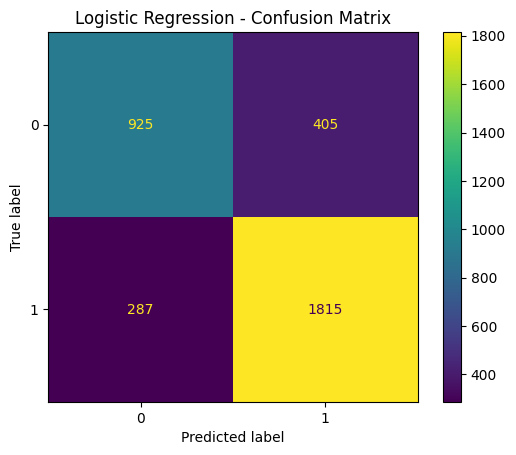

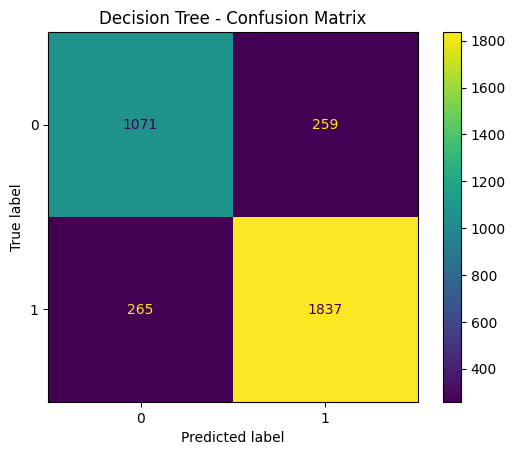

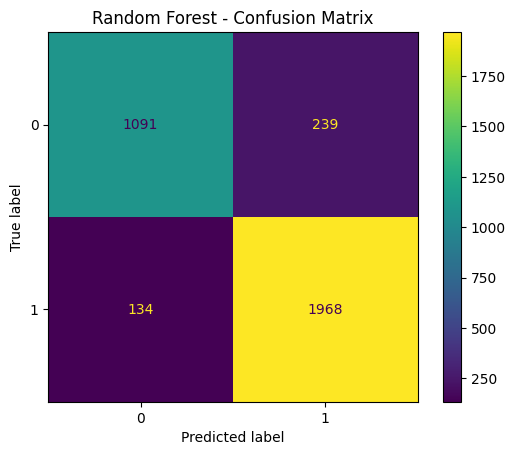

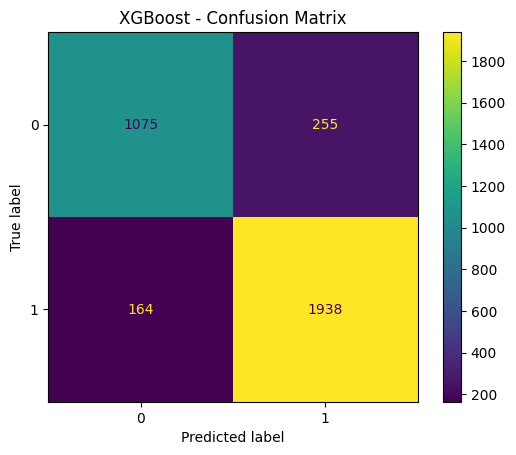

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
plt.show()

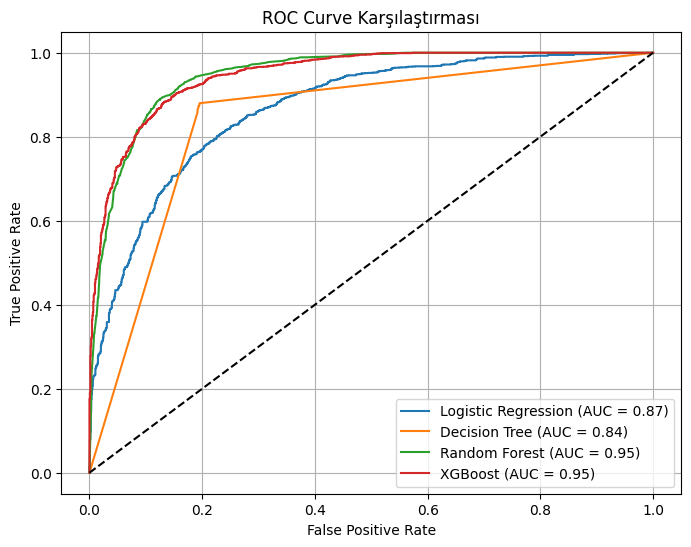

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Karşılaştırması")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import joblib

# Modeli kaydet
joblib.dump(model, 'model.pkl')


['model.pkl']

In [27]:
from google.colab import files

# Dosyayı indir
files.download('model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>